In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from astropy.visualization import quantity_support
import matplotlib
import astropy.units as u
font = {'size'   : 22}

matplotlib.rc('font', **font)
from astroduet.lightcurve import get_lightcurve

In [2]:
def create_and_plot_lc(*args, **kwargs):
    lightcurve = get_lightcurve(*args, **kwargs)
    plt.figure(figsize=(15, 8))
    gs = plt.GridSpec(2, 1, hspace=0)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1], sharex=ax0)
    good = (lightcurve['snr_D1'].value > 1) | (lightcurve['snr_D2'].value > 1)
    lightcurve = lightcurve[good]
    ax0.errorbar(lightcurve['time'].value / 86400, lightcurve['ABmag_D1'].value, 
                 fmt='o', markersize=2, yerr=lightcurve['ABmag_D1_err'].value)
    ax0.errorbar(lightcurve['time'].value / 86400, lightcurve['ABmag_D2'].value, 
                 fmt='o', markersize=2, yerr=lightcurve['ABmag_D2_err'].value)
    ax1.scatter(lightcurve['time'].value / 86400, lightcurve['snr_D1'].value, s=2)
    ax1.scatter(lightcurve['time'].value / 86400, lightcurve['snr_D2'].value, s=2)

    ax0.set_ylabel("AB mag")
    ax1.set_ylabel("S/R")
    ax1.set_xlabel("Time (d)")
    ymin = min(lightcurve['ABmag_D1'].value.min(), lightcurve['ABmag_D2'].value.min()) - 1
    ymax = max(lightcurve['ABmag_D1'].value.max(), lightcurve['ABmag_D2'].value.max()) + 1
    # Inverted ax for magnitude
    ax0.set_ylim([ymax, ymin])
#    ax1.semilogx();
    

Effective PSF size 6.586876649824255 arcsec
Number of effective bgd pixels: 2.922451027617772



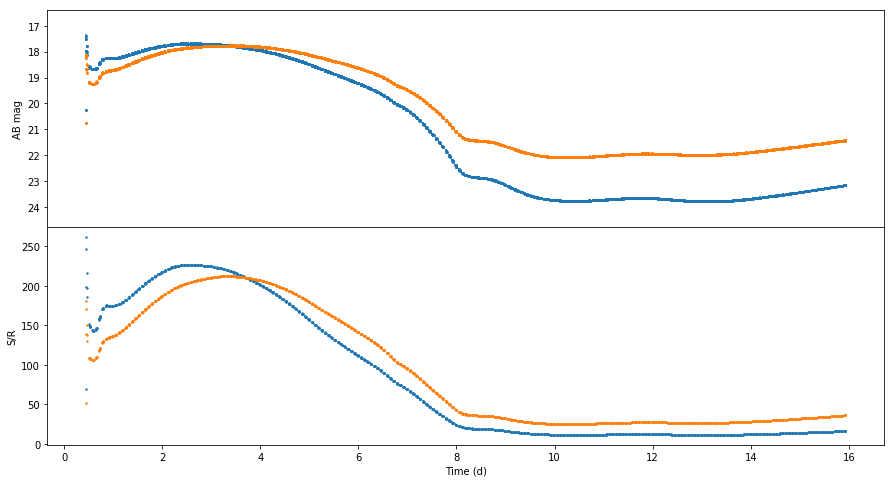

In [3]:
create_and_plot_lc("../astroduet/data/SNIIb_lightcurve_DUET.fits", distance=100e6*u.pc)

Now specifying the observing window...

Effective PSF size 6.586876649824255 arcsec
Number of effective bgd pixels: 2.922451027617772



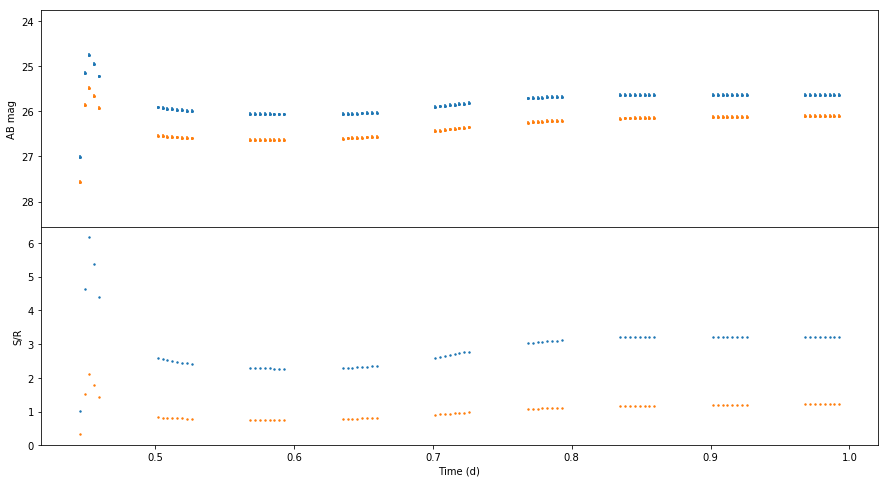

In [4]:
create_and_plot_lc("../astroduet/data/SNIIb_lightcurve_DUET.fits", distance=3000e6*u.pc,
                  observing_windows=np.array([[0, 90000]])*u.s, phase_start=0.5, exposure_per_orbit=40*60.)